# 第一周作业：利用线性回归技术实现Ames 房价预测
何宇博

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.metrics import r2_score  #评价回归预测模型的性能
import matplotlib.pyplot as plt
import seaborn as sns
#color = sns.color_palette()

%matplotlib inline

## 1.数据探索与分析
### 数据读取与基本信息

In [2]:
dpath = '/Users/Yubo/Desktop/machinelearning/CSDN_AI_Eng/csdn_week1/Ames_House/'
train = pd.read_csv(dpath +"Ames_House_train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

现将数据中，Object 字符串的形式数据去掉，以后再慢慢考虑编码。
可以看出只剩下了38个columns。

In [5]:
train = train.select_dtypes(exclude= ['object'])
train.shape

(1460, 38)

检查数据集中的丢失数据，空数据并去除，暂时先不弄填充了

In [6]:
train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [7]:
train = train.dropna()
train.shape

(1121, 38)

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,726.842105,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,185506.152542
std,420.769012,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,82999.159004
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,364.000000,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,131000.000000
50%,725.000000,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,164900.000000
75%,1091.000000,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,219500.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


### 单变量分布分析：y 房屋价格 直方图分布


In [9]:
#target variable
train.SalePrice.describe()

count      1121.000000
mean     185506.152542
std       82999.159004
min       35311.000000
25%      131000.000000
50%      164900.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

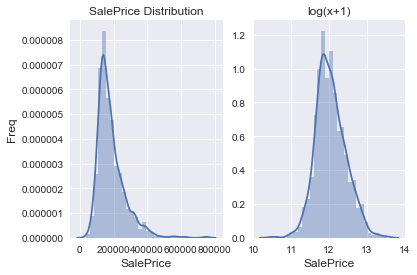

In [10]:
plt.figure()
plt.subplot (121)
sns.distplot(train.SalePrice.values, bins=30, kde=True)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Freq',fontsize = 12)
plt.title('SalePrice Distribution') 
    
plt.subplot (122)
#平滑化
price_log = np.log1p(train.SalePrice.values)
sns.distplot(price_log, bins=30, kde=True)
plt.xlabel('SalePrice', fontsize=12)
plt.title('log(x+1)')

plt.show()

### 数据偏斜度 skewness

In [11]:
print 'skewness:',train.SalePrice.skew()
#正偏

skewness: 1.93361501241


### 房价特征散点

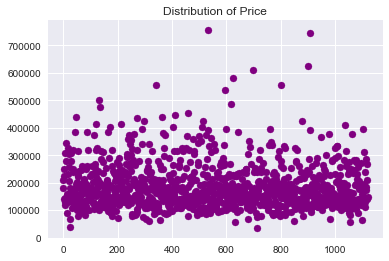

In [12]:
plt.scatter(range(train.shape[0]), train["SalePrice"].values,color='purple')
plt.title("Distribution of Price");
#从下图可以看出只有少量房屋的价格中位数在超过了40W美元,考虑可以当outliner去掉,

In [13]:
train = train[train.SalePrice <= 400000]
train.shape

(1096, 38)

## 输入属性的直方图/分布

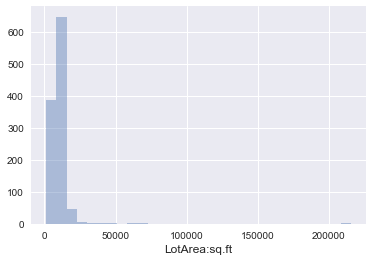

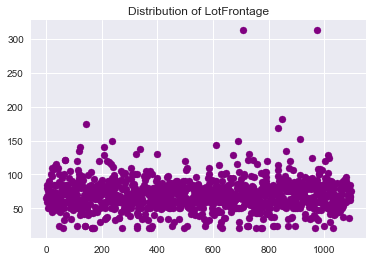

In [14]:
fig = plt.figure()
sns.distplot(train.LotArea.values, bins=30, kde=False)
plt.xlabel('LotArea:sq.ft', fontsize=12)
plt.show()
plt.scatter(range(train.shape[0]), train["LotFrontage"].values,color='purple')
plt.title("Distribution of LotFrontage");

土地的面积分布是长尾分布，和指数分布比较接近。有的太大了，不知道需不需要去除掉，看老师的例子好像不用处理,但是我决定清理一下。。

In [15]:
train = train[train.LotFrontage <= 150]
train.shape

(1090, 38)

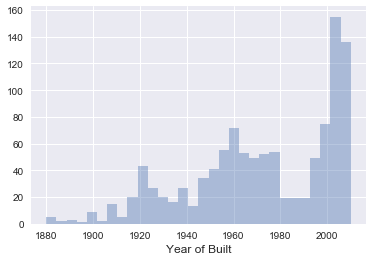

In [16]:
fig = plt.figure()
sns.distplot(train.YearBuilt.values, bins=30, kde=False)
plt.xlabel('Year of Built', fontsize=12)

房屋建造年份，可以不用处理

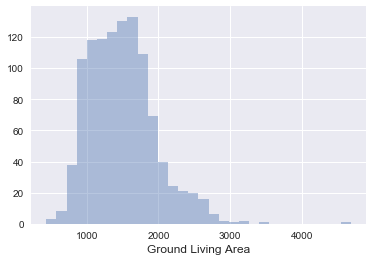

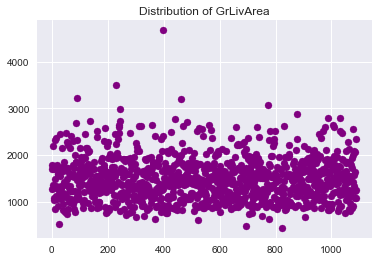

In [17]:
fig = plt.figure()
sns.distplot(train.GrLivArea.values, bins=30, kde=False)
plt.xlabel('Ground Living Area', fontsize=12)
plt.show()
plt.scatter(range(train.shape[0]), train["GrLivArea"].values,color='purple')
plt.title("Distribution of GrLivArea");

地面居住面积，比较符合正态分布，把3000以上的处理下

In [18]:
train = train[train.GrLivArea <= 3000]
train.shape

(1085, 38)

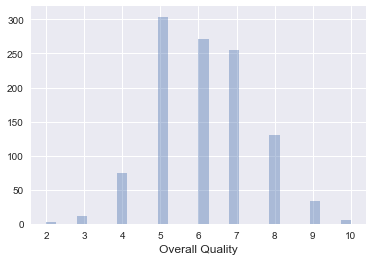

In [19]:
fig = plt.figure()
sns.distplot(train.OverallQual.values, bins=30, kde=False)
plt.xlabel('Overall Quality', fontsize=12)
plt.show()

总体质量比较复合正态分布,不做处理了

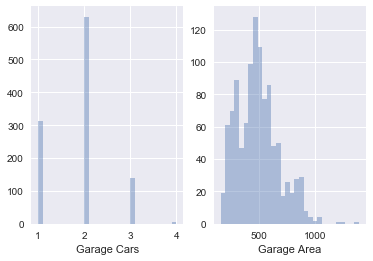

In [20]:
plt.figure()
plt.subplot(121)
sns.distplot(train.GarageCars.values,bins=30, kde = False)
plt.xlabel('Garage Cars')

plt.subplot(122)
sns.distplot(train.GarageArea.values,bins=30, kde =False)
plt.xlabel('Garage Area')

plt.show()

车库数量以及车库面积也比较符合不作处理了就

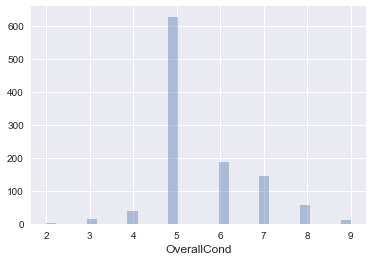

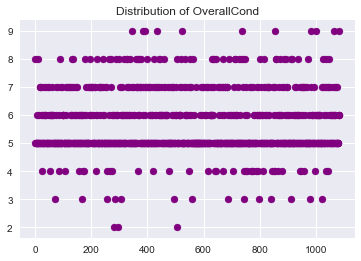

In [21]:
fig = plt.figure()
sns.distplot(train.OverallCond.values, bins=30, kde=False)
plt.xlabel('OverallCond', fontsize=12)
plt.show()
plt.scatter(range(train.shape[0]), train["OverallCond"].values,color='purple')
plt.title("Distribution of OverallCond");

总体状态也比较符合正态分布，不作处理了

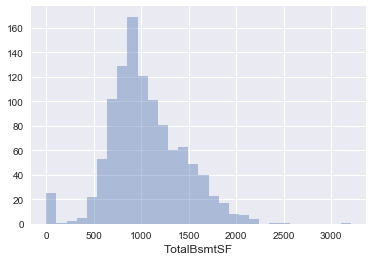

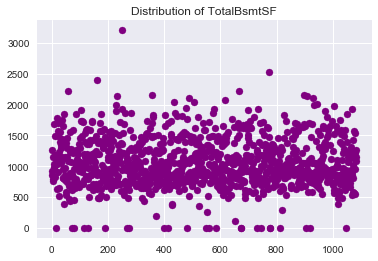

In [22]:
fig = plt.figure()
sns.distplot(train.TotalBsmtSF.values, bins=30, kde=False)
plt.xlabel('TotalBsmtSF', fontsize=12)
plt.show()
plt.scatter(range(train.shape[0]), train["TotalBsmtSF"].values,color='purple')
plt.title("Distribution of TotalBsmtSF");

地下室面积，比较符合，不作处理

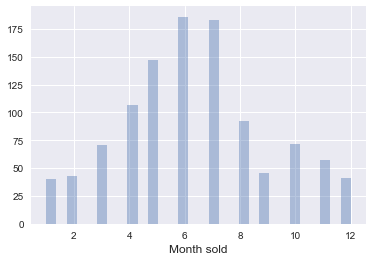

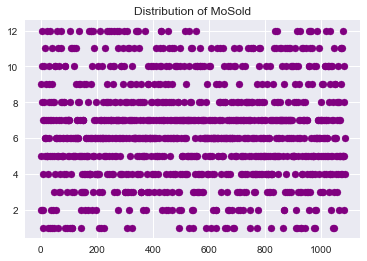

In [23]:
fig = plt.figure()
sns.distplot(train.MoSold.values, bins=30, kde=False)
plt.xlabel('Month sold', fontsize=12)
plt.show()
plt.scatter(range(train.shape[0]), train["MoSold"].values,color='purple')
plt.title("Distribution of MoSold");

月消量很符合正态分布，很好的feature，不作处理

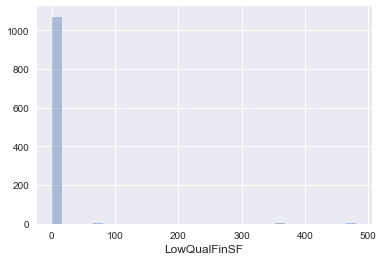

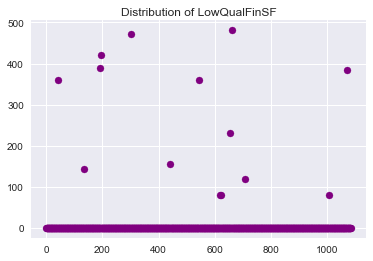

In [24]:
fig = plt.figure()
sns.distplot(train["LowQualFinSF"].values, bins=30, kde=False)
plt.xlabel('LowQualFinSF', fontsize=12)
plt.show()
plt.scatter(range(train.shape[0]), train["LowQualFinSF"].values,color='purple')
plt.title("Distribution of LowQualFinSF");

In [25]:
#低质量完成的面积分析 考虑将非零值去掉减少影响
train = train[train.LowQualFinSF == 0]
train.shape

(1071, 38)

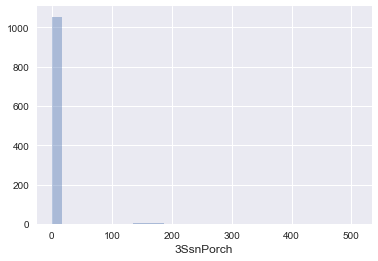

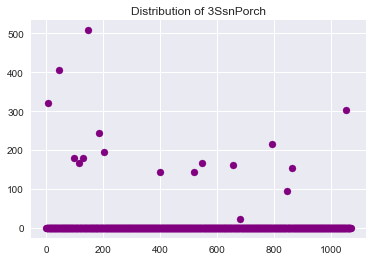

In [26]:
fig = plt.figure()
sns.distplot(train["3SsnPorch"].values, bins=30, kde=False)
plt.xlabel('3SsnPorch', fontsize=12)
plt.show()
plt.scatter(range(train.shape[0]), train["3SsnPorch"].values,color='purple')
plt.title("Distribution of 3SsnPorch");

In [27]:
#考虑将非零h值去掉
train = train[train["3SsnPorch"] == 0]
train.shape

(1054, 38)

## 两两特征之间的相关性

In [28]:
#get the names of all the columns
cols=train.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = train.corr().abs()

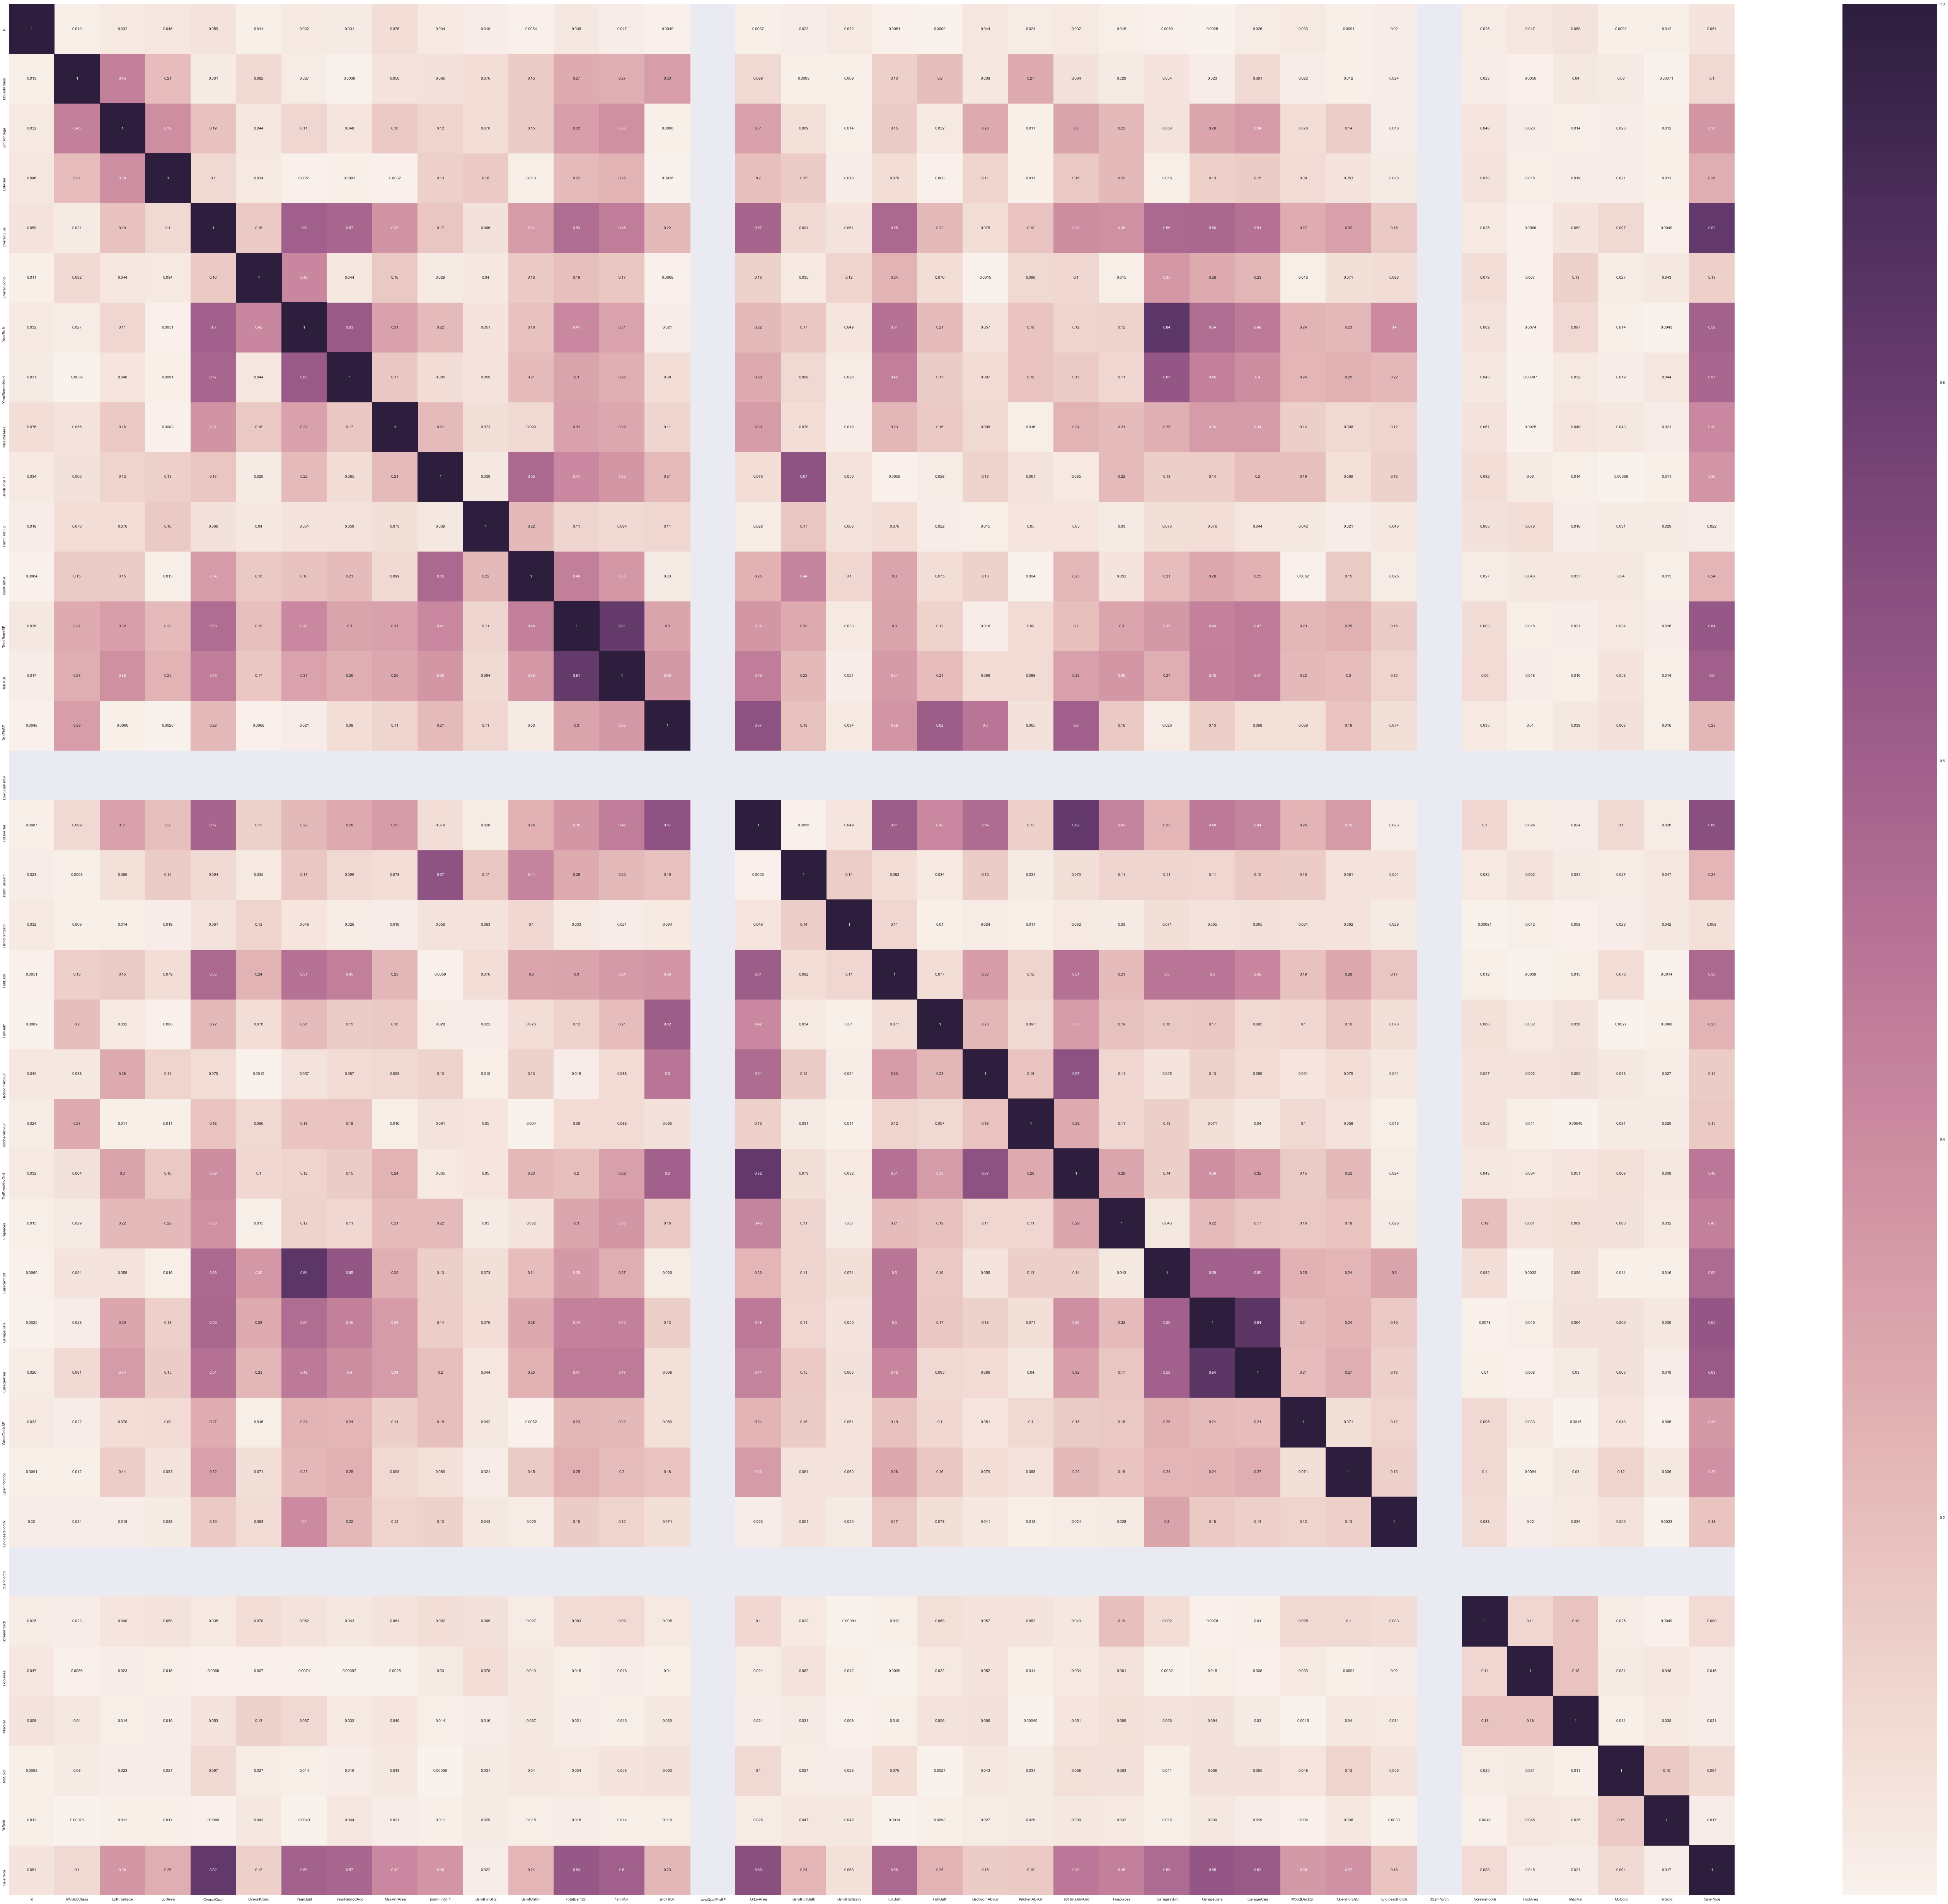

In [30]:
plt.subplots(figsize=(100, 90))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features
sns.heatmap(data_corr, mask=data_corr < 1, cbar=False)

plt.savefig('corrlation.png' )
plt.show()
#我不知道figsize是如何确定的

打印出与target相关大于0.5 为强相关的变量

In [31]:
print(data_corr['SalePrice'].sort_values(ascending = False)[:11])

SalePrice       1.000000
OverallQual     0.818684
GrLivArea       0.692086
GarageCars      0.647360
TotalBsmtSF     0.639330
GarageArea      0.627057
1stFlrSF        0.601431
YearBuilt       0.587833
YearRemodAdd    0.566557
FullBath        0.558300
GarageYrBlt     0.545925
Name: SalePrice, dtype: float64


In [32]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
size = data_corr.shape[1]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

GarageCars and GarageArea = 0.84
YearBuilt and GarageYrBlt = 0.84
OverallQual and SalePrice = 0.82
GrLivArea and TotRmsAbvGrd = 0.82
TotalBsmtSF and 1stFlrSF = 0.81
GrLivArea and SalePrice = 0.69
2ndFlrSF and GrLivArea = 0.67
BedroomAbvGr and TotRmsAbvGrd = 0.67
BsmtFinSF1 and BsmtFullBath = 0.67
GarageCars and SalePrice = 0.65
YearRemodAdd and GarageYrBlt = 0.65
TotalBsmtSF and SalePrice = 0.64
GarageArea and SalePrice = 0.63
YearBuilt and YearRemodAdd = 0.63
2ndFlrSF and HalfBath = 0.62
GrLivArea and FullBath = 0.61
1stFlrSF and SalePrice = 0.60
2ndFlrSF and TotRmsAbvGrd = 0.60
OverallQual and YearBuilt = 0.60
GarageYrBlt and GarageCars = 0.59
GarageYrBlt and GarageArea = 0.59
YearBuilt and SalePrice = 0.59
OverallQual and GrLivArea = 0.57
OverallQual and YearRemodAdd = 0.57
YearRemodAdd and SalePrice = 0.57
OverallQual and GarageCars = 0.56
FullBath and SalePrice = 0.56
OverallQual and GarageYrBlt = 0.56
BsmtFinSF1 and BsmtUnfSF = 0.55
OverallQual and FullBath = 0.55
GarageYrBlt and

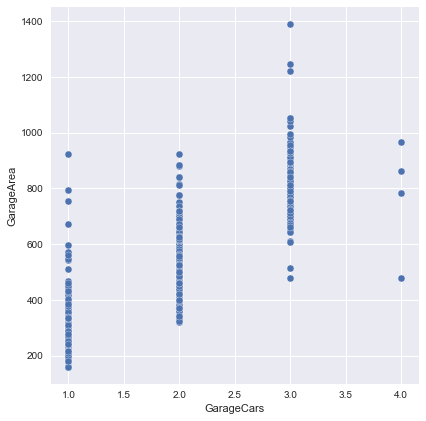

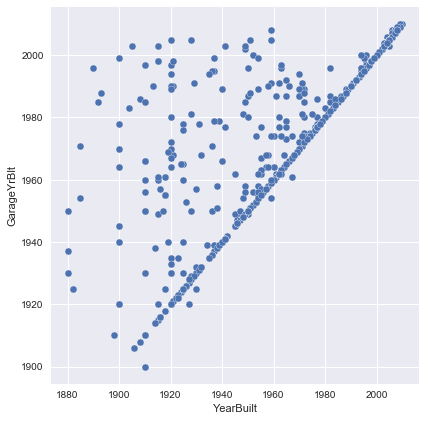

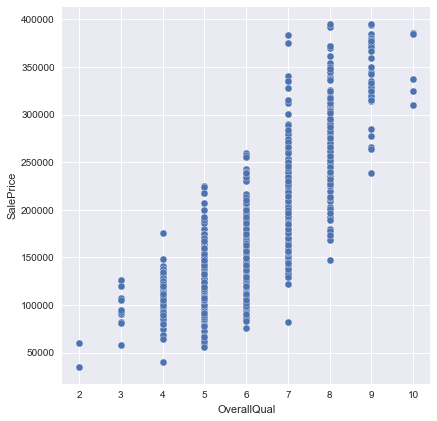

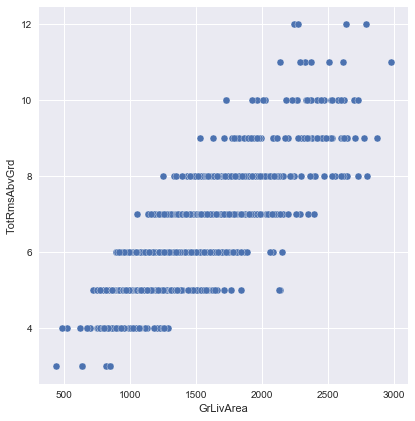

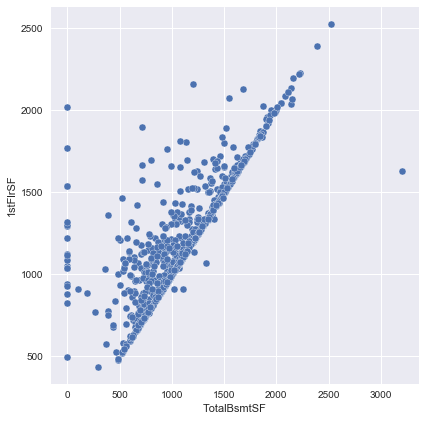

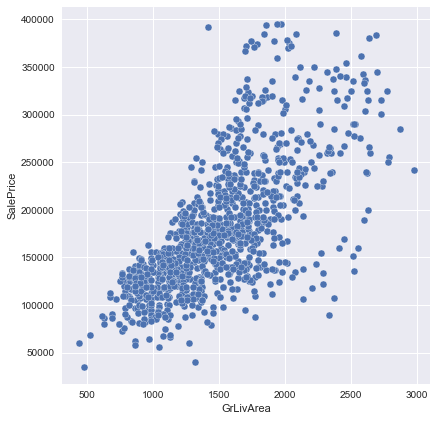

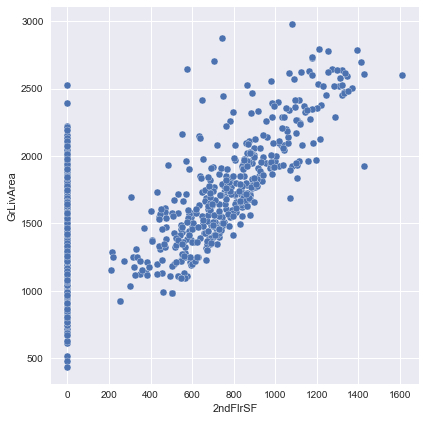

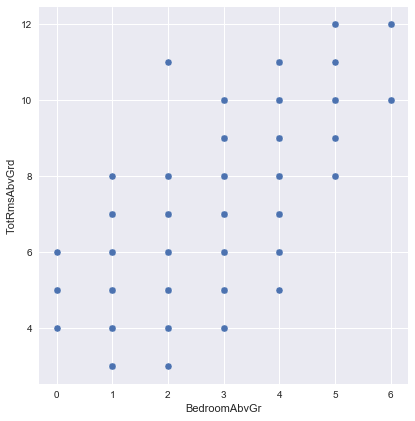

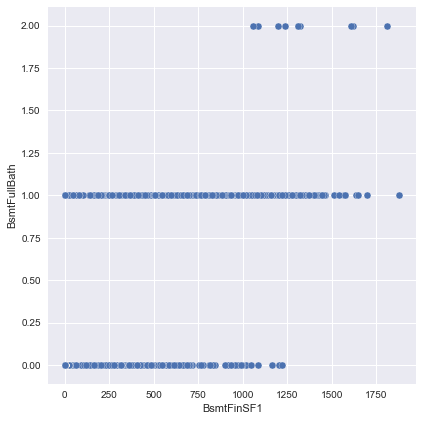

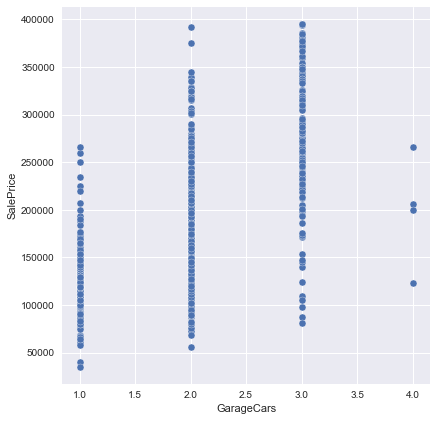

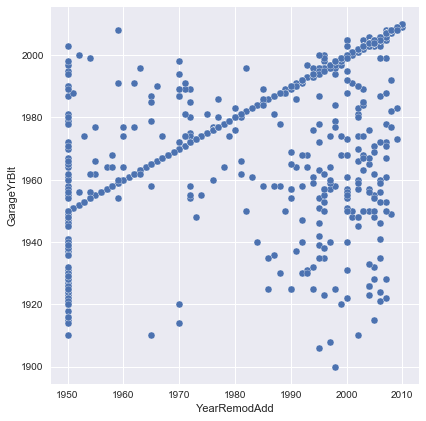

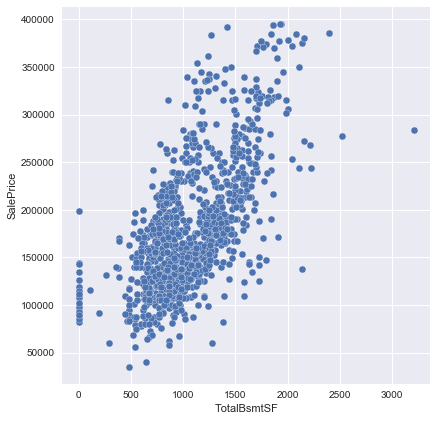

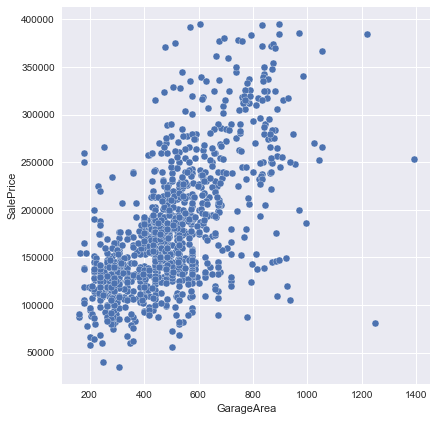

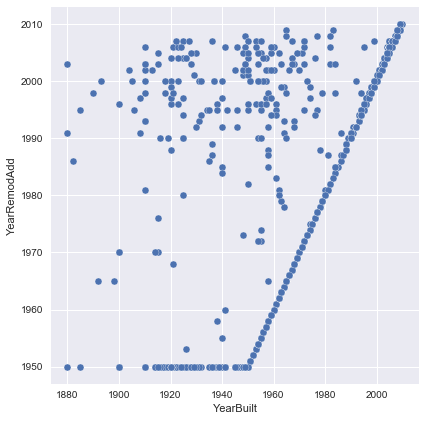

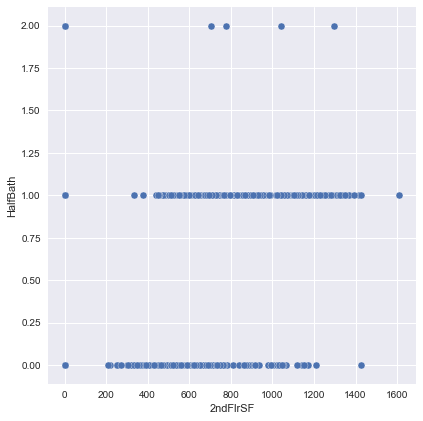

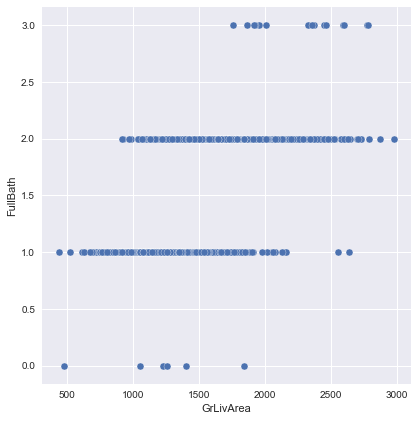

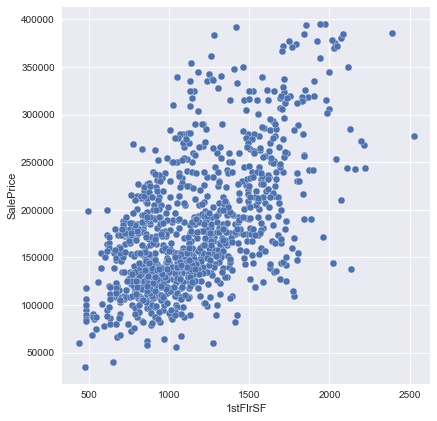

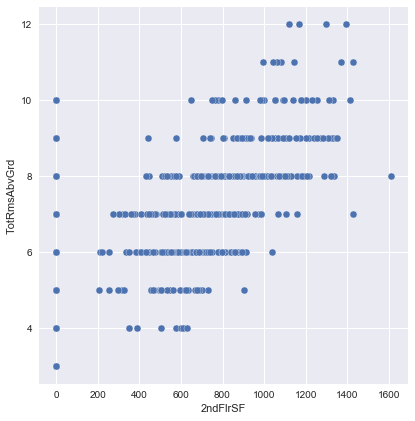

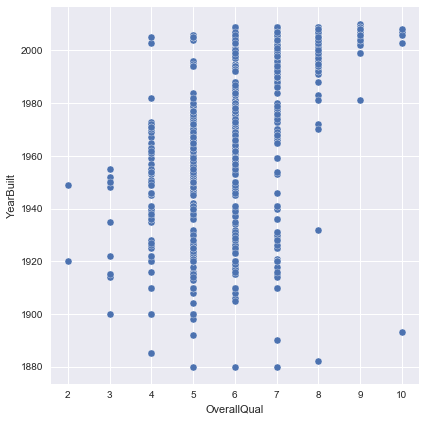

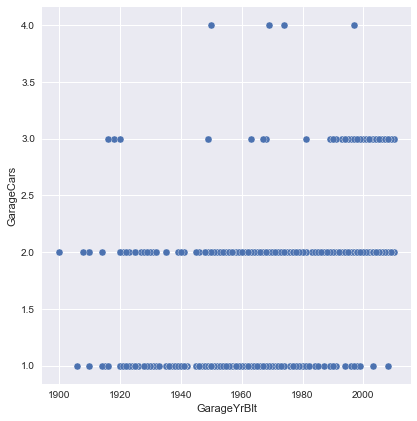

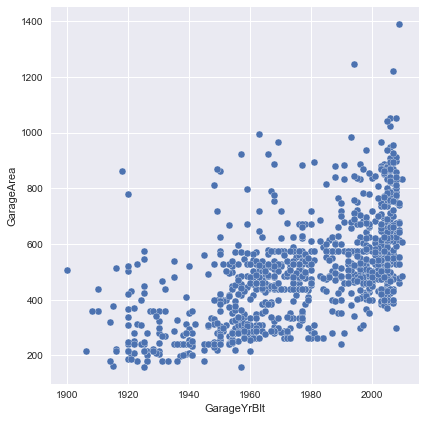

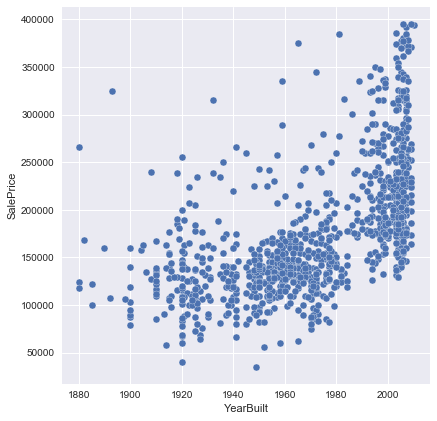

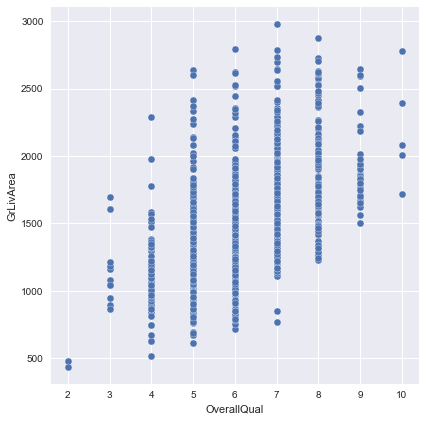

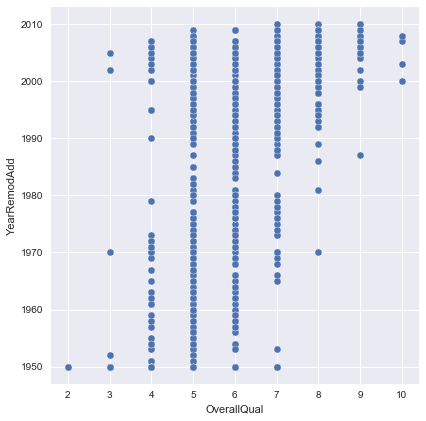

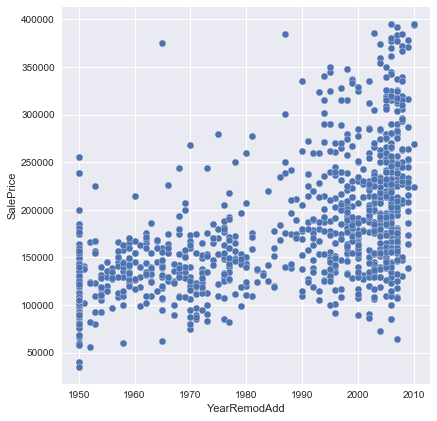

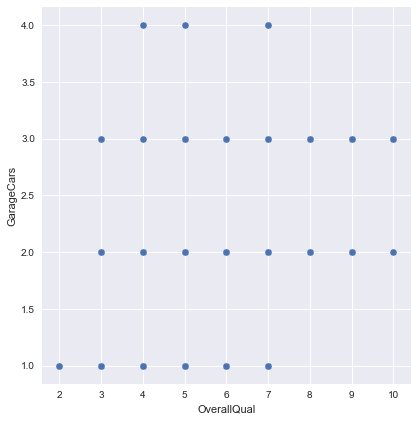

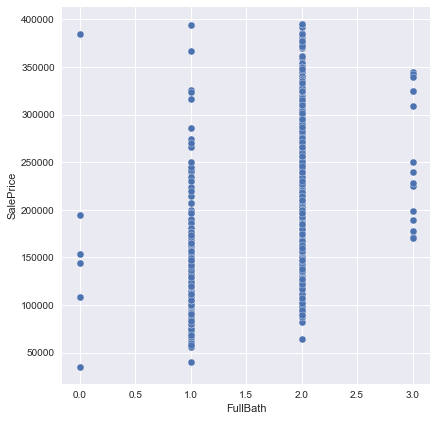

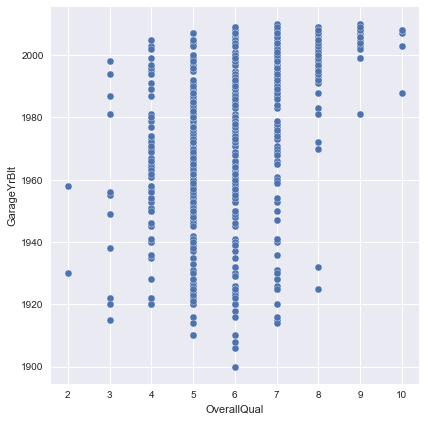

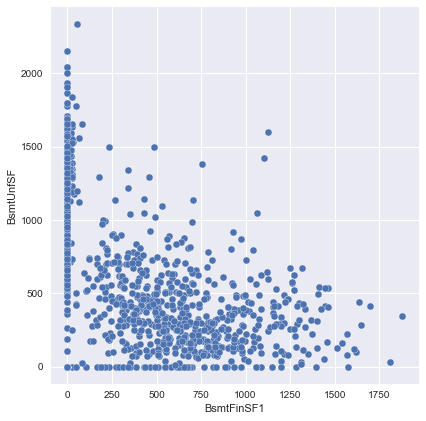

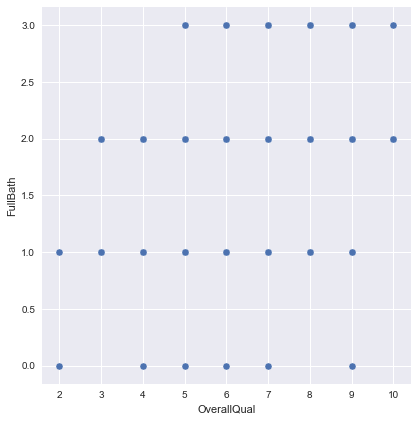

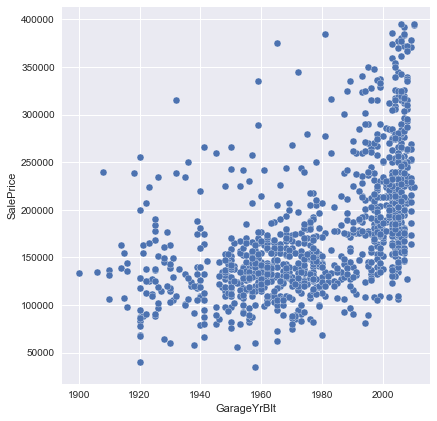

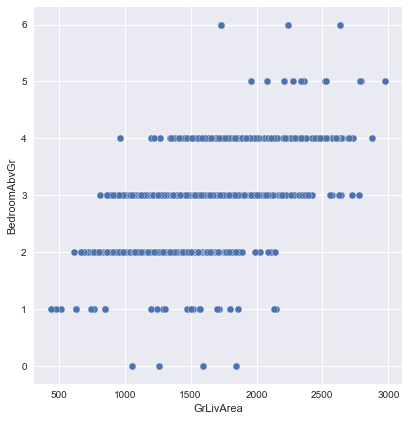

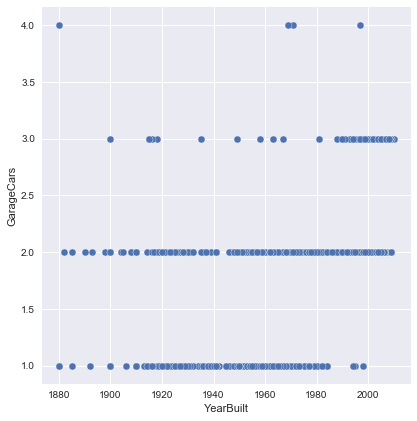

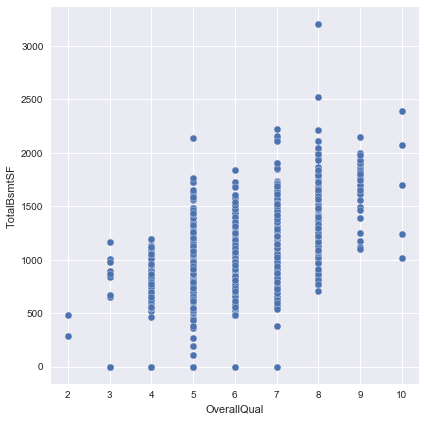

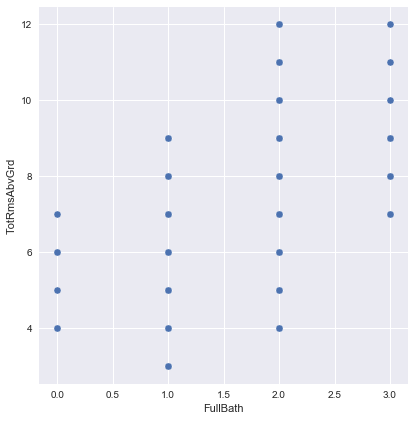

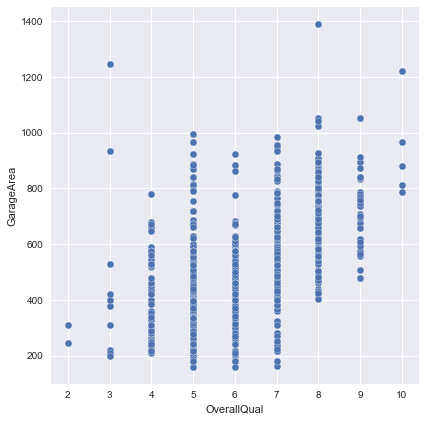

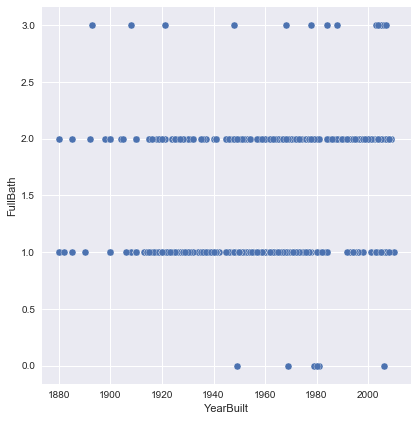

In [33]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(train, size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

## 2 数据的预处理与特征工程

保留与SalePrice相关性最高的10个变量，同时也是在0.5以上的

In [34]:
print(data_corr['SalePrice'].sort_values(ascending = False)[:11])
dataSet = train[ ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','GarageArea','1stFlrSF','GarageCars','GrLivArea','YearBuilt','YearRemodAdd','FullBath','GarageYrBlt']]

SalePrice       1.000000
OverallQual     0.818684
GrLivArea       0.692086
GarageCars      0.647360
TotalBsmtSF     0.639330
GarageArea      0.627057
1stFlrSF        0.601431
YearBuilt       0.587833
YearRemodAdd    0.566557
FullBath        0.558300
GarageYrBlt     0.545925
Name: SalePrice, dtype: float64


In [35]:
dataSet.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,GarageCars,GrLivArea,YearBuilt,YearRemodAdd,FullBath,GarageYrBlt
0,208500,7,1710,2,856,548,856,2,1710,2003,2003,2,2003.0
1,181500,6,1262,2,1262,460,1262,2,1262,1976,1976,2,1976.0
2,223500,7,1786,2,920,608,920,2,1786,2001,2002,2,2001.0
3,140000,7,1717,3,756,642,961,3,1717,1915,1970,1,1998.0
4,250000,8,2198,3,1145,836,1145,3,2198,2000,2000,2,2000.0


In [36]:
dataSet.shape

(1054, 13)

In [37]:
# 从原始数据中分离输入特征x和输出y
y = dataSet['SalePrice'].values
X = dataSet.drop('SalePrice', axis = 1)

In [38]:
#将数据分割训练数据与测试数据
from sklearn.cross_validation import train_test_split

# 随机采样25%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)



/Users/Yubo/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 分别初始化对特征和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

# 分别对训练和测试数据的特征以及目标值进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

#y_train = ss_y.fit_transform(y_train)
#y_test = ss_y.transform(y_test)

y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))

/Users/Yubo/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


## 3. 确定模型类型


尝试缺省参数的线性回归

In [40]:
# 线性回归
#class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
from sklearn.linear_model import LinearRegression

# 使用默认配置初始化
lr = LinearRegression()

# 训练模型参数
lr.fit(X_train, y_train)

# 预测，下面计算score会自动调用predict
lr_y_predict = lr.predict(X_test)
lr_y_predict_train = lr.predict(X_train)

#显示特征的回归系数
lr.coef_

array([[ 0.35432477,  0.17018997,  0.01506466,  0.16908077,  0.11728205,
         0.03285185,  0.01506466,  0.17018997,  0.14471112,  0.12265651,
        -0.08566719, -0.04297864]])

模型评价。。感觉后面都是按照老师的走

In [41]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果

#测试集
print 'The value of default measurement of LinearRegression on test is', lr.score(X_test, y_test)

#训练集
print 'The value of default measurement of LinearRegression on train is', lr.score(X_train, y_train)

The value of default measurement of LinearRegression on test is 0.777192017082
The value of default measurement of LinearRegression on train is 0.844962690998


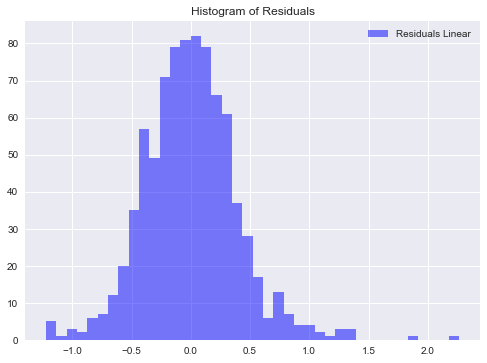

In [42]:
#在训练集上观察预测残差的分布，看是否符合模型假设：噪声为0均值的高斯噪声
f, ax = plt.subplots(figsize=(7, 5)) 
f.tight_layout() 
ax.hist(y_train - lr_y_predict_train,bins=40, label='Residuals Linear', color='b', alpha=.5); 
ax.set_title("Histogram of Residuals") 
ax.legend(loc='best');

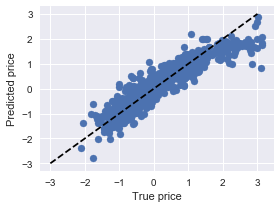

In [43]:
#还可以观察预测值与真值的散点图
plt.figure(figsize=(4, 3))
plt.scatter(y_train, lr_y_predict_train)
plt.plot([-3, 3], [-3, 3], '--k')   #数据已经标准化，3倍标准差即可
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.tight_layout()

In [44]:
# 线性模型，随机梯度下降优化模型参数
# 随机梯度下降一般在大数据集上应用，其实本项目不适合用
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
sgdr = SGDRegressor(n_iter=1000)

# 训练：参数估计
sgdr.fit(X_train, y_train)

# 预测
#sgdr_y_predict = sgdr.predict(X_test)

sgdr.coef_

/Users/Yubo/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.35576818,  0.17112074,  0.01671591,  0.17056576,  0.11837195,
        0.03452194,  0.01671591,  0.17112074,  0.14619764,  0.12360603,
       -0.08427942, -0.04196974])

In [45]:
# 使用SGDRegressor模型自带的评估模块，并输出评估结果
print 'The value of default measurement of SGDRegressor on test is', sgdr.score(X_test, y_test)
print 'The value of default measurement of SGDRegressor on train is', sgdr.score(X_train, y_train)

The value of default measurement of SGDRegressor on test is 0.776542026995
The value of default measurement of SGDRegressor on train is 0.844825918146


结果差不多，几乎没有差别

## 正则化的线性回归（L2正则 --> 岭回归）


In [46]:
#岭回归／L2正则
#class sklearn.linear_model.RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, 
#                                  normalize=False, scoring=None, cv=None, gcv_mode=None, 
#                                  store_cv_values=False)
from sklearn.linear_model import  RidgeCV

alphas = [0.01, 0.1, 1, 10,20, 40, 80,100]
reg = RidgeCV(alphas=alphas, store_cv_values=True)   
reg.fit(X_train, y_train)     

RidgeCV(alphas=[0.01, 0.1, 1, 10, 20, 40, 80, 100], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=True)

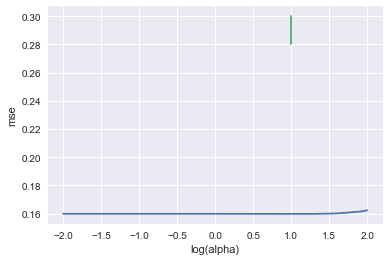

('alpha is:', 10.0)


array([[ 0.3478286 ,  0.16893207,  0.01738383,  0.16715851,  0.112495  ,
         0.0370346 ,  0.01738383,  0.16893207,  0.13848569,  0.12165883,
        -0.08094262, -0.03515123]])

In [47]:
mse_mean = np.mean(reg.cv_values_, axis = 0)
plt.plot(np.log10(alphas), mse_mean.reshape(len(alphas),1)) 
plt.plot(np.log10(reg.alpha_)*np.ones(3), [0.28, 0.29, 0.30])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

print ('alpha is:', reg.alpha_)
reg.coef_

In [48]:
print 'The value of default measurement of RidgeRegression is', reg.score(X_test, y_test)

The value of default measurement of RidgeRegression is 0.77716700603


## 正则化的线性回归（L1正则 --> Lasso）

In [49]:
#### Lasso／L1正则
# class sklearn.linear_model.LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, 
#                                    normalize=False, precompute=’auto’, max_iter=1000, 
#                                    tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=1,
#                                    positive=False, random_state=None, selection=’cyclic’)
from sklearn.linear_model import LassoCV

alphas = [0.01, 0.1, 1, 10,100]

lasso = LassoCV(alphas=alphas)   
lasso.fit(X_train, y_train)       

/Users/Yubo/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=[0.01, 0.1, 1, 10, 100], copy_X=True, cv=None, eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

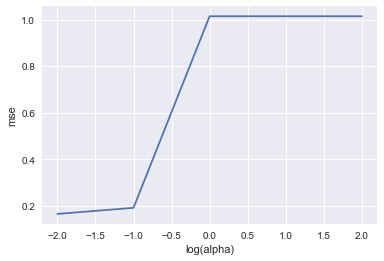

('alpha is:', 0.01)


array([ 0.35333734,  0.29799504,  0.02313013,  0.17182991,  0.10627264,
        0.03133718,  0.00277325,  0.02157999,  0.10194306,  0.10706842,
       -0.04803292, -0.        ])

In [50]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)
lasso.coef_  

In [51]:
# 使用LinearRegression模型自带的评估模块（r2_score），并输出评估结果
print 'The value of default measurement of Lasso Regression on test is', lasso.score(X_test, y_test)
print 'The value of default measurement of Lasso Regression on train is', lasso.score(X_train, y_train)

The value of default measurement of Lasso Regression on test is 0.775224690062
The value of default measurement of Lasso Regression on train is 0.843563544619


## 4. 对测试数据集进行预测

In [78]:
test = pd.read_csv(dpath +"Ames_House_test.csv")

dataTest = test[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','GarageArea','1stFlrSF','GarageCars','GrLivArea','YearBuilt','YearRemodAdd','FullBath','GarageYrBlt']]

In [79]:
dataTest.isnull().sum()

OverallQual      0
GrLivArea        0
GarageCars       1
TotalBsmtSF      1
GarageArea       1
1stFlrSF         0
GarageCars       1
GrLivArea        0
YearBuilt        0
YearRemodAdd     0
FullBath         0
GarageYrBlt     78
dtype: int64

In [80]:
#有空数据，对其进行填充
#dataTest = dataTest.fillna(dataTest.median())
#！！！！！不知道为什么我用上面的代码进行中值填充，始终填不进去啊，只能用下面的，求解答
dataTest = dataTest.fillna(method='pad')



In [81]:
dataTest.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
GarageArea      0
1stFlrSF        0
GarageCars      0
GrLivArea       0
YearBuilt       0
YearRemodAdd    0
FullBath        0
GarageYrBlt     0
dtype: int64

随机梯度效果要略微好于其他,将四种不同模型分别计算预测结果并输出

In [82]:
XTest = ss_X.transform(dataTest)

In [85]:

lr_yTest_predict = lr.predict(XTest)
lr_yTest_predict = ss_y.inverse_transform(lr_yTest_predict)
test["SalePrice_lr"] = lr_yTest_predict

sgdr_yTest_predict = sgdr.predict(XTest)
sgdr_yTest_predict = ss_y.inverse_transform(sgdr_yTest_predict)
test["SalePrice_sgdr"] = sgdr_yTest_predict

reg_yTest_predict = reg.predict(XTest)
reg_yTest_predict = ss_y.inverse_transform(reg_yTest_predict)
test["SalePrice_ridge"] = reg_yTest_predict

lasso_yTest_predict = lasso.predict(XTest)
lasso_yTest_predict = ss_y.inverse_transform(lasso_yTest_predict)
test["SalePrice_lasso"] = lasso_yTest_predict

test.to_csv("/Users/Yubo/Desktop/machinelearning/CSDN_AI_Eng/csdn_week1/Ames_House/output/reg_result.csv")